<a href="https://colab.research.google.com/github/NguyenTanPhats/Exercies_AI/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def save_data(root_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    # Lặp qua các thư mục con con trong thư mục gốc
    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            # Lặp qua các file trong từng thư mục con  chứa các ảnh
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    # print("File=", file)

    x = np.array(x)
    y = np.array(y)

    encoder = LabelBinarizer()
    y = encoder.fit_transform(y)
    print(y)

    file = open('/content/drive/MyDrive/money/model_money.data', 'wb')
    # dump information to that file
    pickle.dump((x,y), file)
    # close the file
    file.close()

save_data('/content/drive/MyDrive/money')

Folder = 20000
Folder = 10000
Folder = 50000
Folder = 500000
Folder = 200000
Folder = 5000
Folder = 100000
Folder = .ipynb_checkpoints
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/money/model_money.data', 'rb')

    # dump information to that file
    (pixels, y) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(y.shape)

    return pixels, y

x, y = load_data()

(1760, 224, 224, 3)
(1760, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(1408, 224, 224, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [ ]:
kq = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
h = model.fit_generator(kq.flow(X_train, y_train, batch_size=64), epochs=15, validation_data=kq.flow(X_test,y_test, batch_size=64))

<ipython-input-51-f6d2e7496e43>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(kq.flow(X_train, y_train, batch_size=64), epochs=15, validation_data=kq.flow(X_test,y_test, batch_size=64))


Epoch 1/15
22/22 [==============================] - 47s 1s/step - loss: 1.9432 - accuracy: 0.1342 - val_loss: 1.9148 - val_accuracy: 0.1449
Epoch 2/15
22/22 [==============================] - 22s 994ms/step - loss: 1.5894 - accuracy: 0.3544 - val_loss: 1.4801 - val_accuracy: 0.3580
Epoch 3/15
22/22 [==============================] - 23s 1s/step - loss: 1.2303 - accuracy: 0.4574 - val_loss: 1.1028 - val_accuracy: 0.4858
Epoch 4/15
22/22 [==============================] - 24s 1s/step - loss: 1.0037 - accuracy: 0.5504 - val_loss: 0.8119 - val_accuracy: 0.6818
Epoch 5/15
22/22 [==============================] - 22s 976ms/step - loss: 0.7149 - accuracy: 0.7102 - val_loss: 0.5227 - val_accuracy: 0.8125
Epoch 6/15
22/22 [==============================] - 23s 1s/step - loss: 0.6448 - accuracy: 0.7536 - val_loss: 0.5586 - val_accuracy: 0.7727
Epoch 7/15
22/22 [==============================] - 21s 951ms/step - loss: 0.5000 - accuracy: 0.8068 - val_loss: 0.5378 - val_accuracy: 0.7955
Epoch 8/15


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model_money.h5')

In [ ]:
from keras.models import load_model
model1 = load_model('/content/drive/MyDrive/Colab Notebooks/model_money.h5')

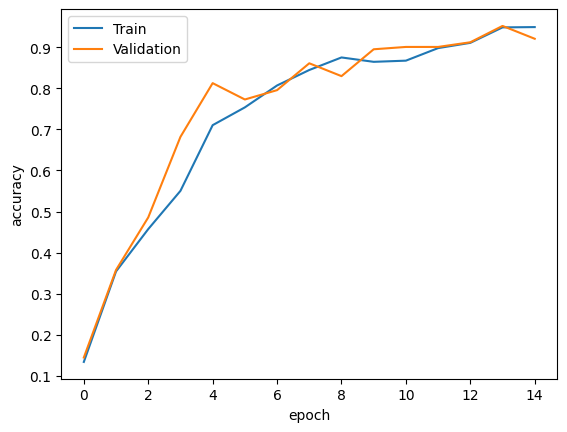

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

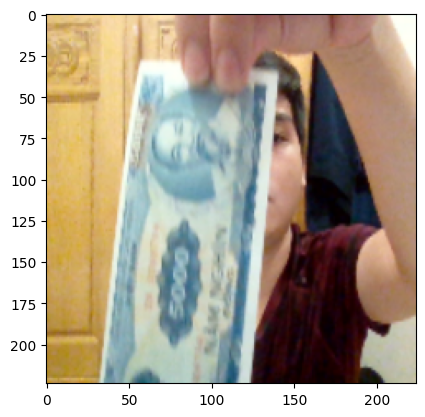

1/1 [==============================] - 0s 34ms/step
This picture is:  5000


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[200]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[200]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

print("This picture is: ", class_name[np.argmax(result[0])])


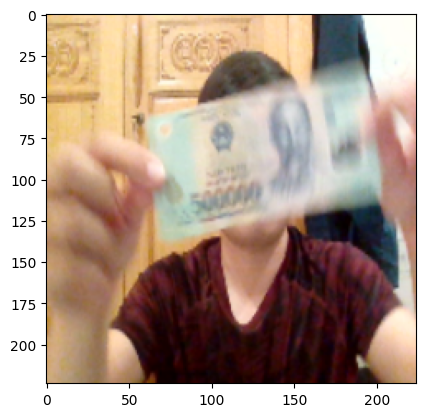

1/1 [==============================] - 0s 19ms/step
This picture is:  500000


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[3]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[3]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

print("This picture is: ", class_name[np.argmax(result[0])])

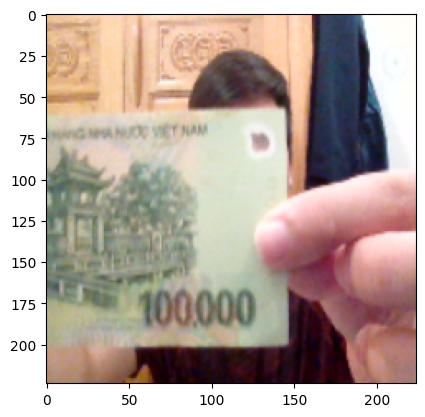

1/1 [==============================] - 0s 108ms/step
This picture is:  100000


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[272]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[272]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)

print("This picture is: ", class_name[np.argmax(result[0])])